In [ ]:
%matplotlib                    # Pyplot 그래프 새창에서 열기 옵션

In [ ]:
%matplotlib inline             # Pyplot 그래프 새창에서 열기 '취소' 옵션

In [2]:
pd.set_option('display.max_rows',    100)      # DataFrame 데이터 확인 시 최대 표시 행 수
pd.set_option('display.max_columns', 100)      # DataFrame 데이터 확인 시 최대 표시 열 수

## 라이브러리 import

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sb
import scipy.stats       as sp
import matplotlib.pyplot as plt

.

.

.



## 데이터 불러오기

In [3]:
FeatureData = pd.read_csv('./ProcessedData/FeatureData', sep=',', header=None)
FeatureData.shape

(50, 360)

특징데이터 정상/고장 분리

In [4]:
NoOfData = int(FeatureData.shape[1]/2)
Normal_FeatureData   = FeatureData.iloc[:,:NoOfData]
Abnormal_FeatureData = FeatureData.iloc[:,NoOfData:]

print(Normal_FeatureData.shape)
print(Abnormal_FeatureData.shape)

(50, 180)
(50, 180)


.

.

.



## P-value 계산

In [5]:
NoOfFeature = FeatureData.shape[0] # 추출된 Feature 갯수

P_value = np.zeros((NoOfFeature , 2))

# 특징값 각각 T-검정 수행
for i in np.arange(NoOfFeature):
    
    T_test       = np.array(sp.ttest_ind(Normal_FeatureData.iloc[i,:] , Abnormal_FeatureData.iloc[i,:]))
    P_value[i,0] = i          # Feature Index
    P_value[i,1] = T_test[1]  # P값 (P-value)
    
P_value      = pd.DataFrame(P_value)
P_value

,0,1
0,0.0,1.014879e-11
1,1.0,8.509037e-11
2,2.0,2.246947e-08
3,3.0,1.340717e-15
4,4.0,5.902344e-12
5,5.0,1.481170e-02
6,6.0,4.967802e-11
7,7.0,1.231454e-11
8,8.0,2.286010e-15
9,9.0,4.617731e-11


In [45]:
P_value_Rank = P_value.sort_values([1],ascending=True)  # P-value 기준 오름차순 정렬

P_value_Rank

,0,1
35,35.0,8.968269e-01
29,29.0,5.858602e-01
42,42.0,4.537752e-01
28,28.0,2.915583e-01
25,25.0,1.501369e-01
19,19.0,1.380529e-01
18,18.0,1.340581e-01
38,38.0,1.122680e-01
49,49.0,1.064726e-01
48,48.0,9.660333e-02


In [46]:
# 특징값 저장
path1 = './ProcessedData/P_value'        # path = '파일 경로/저장할 파일 이름'
path2 = './ProcessedData/P_value_Rank_lower'   # path = '파일 경로/저장할 파일 이름'
P_value.to_csv(path1, sep=',', header=None, index=None)
P_value_Rank.to_csv(path2, sep=',', header=None, index=None)

.

.

.



## PDF(Probabilistic Density Function) 그래프 확인 (정상 vs 고장)

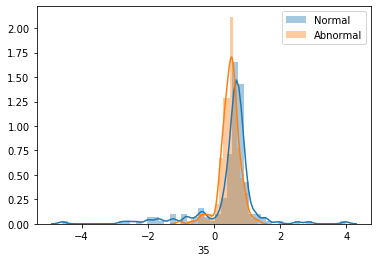

In [32]:
# P-value 낮은 순위
FeatureRank = 1

# PDF 그래프
sb.distplot(Normal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank-1,0])  ,:], label = 'Normal')
sb.distplot(Abnormal_FeatureData.iloc[int(P_value_Rank.iloc[FeatureRank-1,0]),:], label = 'Abnormal')
plt.legend(loc='upper right')
plt.show()


## P-value 기반 구분성(유의수준↓) 상위 특징값 선택

In [47]:
Rank = 5

Normal   = np.zeros((Rank,NoOfData))
Abnormal = np.zeros((Rank,NoOfData))

for i in range(Rank):
    
    index         = int(P_value_Rank.iloc[i,0])
    Normal[i,:]   = Normal_FeatureData.iloc[index,:].values
    Abnormal[i,:] = Abnormal_FeatureData.iloc[index,:].values

# 정상, 고장 특징값 합치기    
FeatureSelected = pd.DataFrame(np.concatenate([Normal, Abnormal] , axis=1))

print("Selected Feature Data Size :", FeatureSelected.shape)
print("= 데이터 %d개(정상/고장 각 %d개씩)가 각각 %d개의 최종 선택된 특징값으로 구성됨"
      %(FeatureSelected.shape[1], FeatureSelected.shape[1]/2, FeatureSelected.shape[0]))

Selected Feature Data Size : (5, 360)
= 데이터 360개(정상/고장 각 180개씩)가 각각 5개의 최종 선택된 특징값으로 구성됨


최종 선택된 특징 데이터 저장 (.csv 파일)

In [2]:
path = './ProcessedData//ST55_HW2_2'   # path = '파일 경로//저장할 파일 이름'
FeatureSelected.to_csv(path, sep=',', header=None, index=None)

NameError: name 'FeatureSelected' is not defined